In [1]:
# -------------------------------------------------------------------------------
# import packages
import import_ipynb
import statistics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------------------------------------------------------
# import scripts
from data_processing import hiring_data
import functions.algorithmic_model as am
import functions.simulation_vis as sm_vis
import functions.qualification as qual_plot

In [2]:
# data to X and y
X = hiring_data.drop(columns=['decision', 'Id', 'sport'])
y = hiring_data['decision']

beta = [0, 0.2, 0.6]

# Logistic Model - No Group Fairness

In [3]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

results_lm_1 = []
labels = ['Second Stage A', 'Second Stage B', 'Second Stage C']

qual_male_first_stage_df_lm_1 = []
qual_female_first_stage_df_lm_1 = []

qual_male_second_stage_df_lm_1 = []
qual_female_second_stage_df_lm_1 = []

cm_df_list = []
fairness_metrics_list = []

for discrimination in beta:
    (X_train, y_train, model, gender_shares1, all_selected_lm_1, gender_shares2, 
     qual_male_first_stage, qual_female_first_stage, 
     qual_male_second_stage, qual_female_second_stage, cm_df, fairness_metrics) = am.logistic_regression(X, y, "logistic", discrimination, enforce_fairness=False)

    cm_df_list.append(cm_df)
    fairness_metrics_list.append(fairness_metrics)

    print("-"*30)

    # get mean of gender shares of list
    mean_value = statistics.mean(gender_shares1)
    print("Mean:", mean_value)

    # get mean for gender share 2
    mean_value = statistics.mean(gender_shares2)
    print("Mean:", mean_value)

    # get all_selected for each into results
    results_lm_1.append(all_selected_lm_1)

    print("-"*30)

    # Extract the values from each Series in the list and flatten it
    flat_qualification_male = [item.mean() for item in qual_male_first_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_first_stage if not item.empty]

    # Now, calculate the overall mean of the male qualifications
    mean_male_qualification = statistics.mean(flat_qualification_male)
    print("Mean Male Qualification:", mean_male_qualification)
    qual_male_first_stage_df_lm_1.append(flat_qualification_male)

    # get qual_female_first_stage mean
    mean_female_qualification = statistics.mean(flat_qualification_female)
    print("Mean Female Qualification:", mean_female_qualification)
    qual_female_first_stage_df_lm_1.append(flat_qualification_female)

    # second stage
    flat_qualification_male = [item.mean() for item in qual_male_second_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_second_stage if not item.empty]

    # append
    qual_male_second_stage_df_lm_1.append(flat_qualification_male)
    qual_female_second_stage_df_lm_1.append(flat_qualification_female)


------------------------------
Mean: 0.34102525315109006
Mean: 0.2888
------------------------------
Mean Male Qualification: 61.97336602676972
Mean Female Qualification: 67.11997861729773
------------------------------
Mean: 0.34102525315109006
Mean: 0.372
------------------------------
Mean Male Qualification: 61.97336602676972
Mean Female Qualification: 67.11997861729773
------------------------------
Mean: 0.34102525315109006
Mean: 0.4966
------------------------------
Mean Male Qualification: 61.97336602676972
Mean Female Qualification: 67.11997861729773


In [4]:
cm_df_list

[          Predicted 0  Predicted 1
 Actual 0          484           64
 Actual 1          149           87,
           Predicted 0  Predicted 1
 Actual 0          484           64
 Actual 1          149           87,
           Predicted 0  Predicted 1
 Actual 0          484           64
 Actual 1          149           87]

In [5]:
fairness_metrics_list

[{'tpr_difference': 0.15325282430853138,
  'fpr_difference': 0.08631559305316754,
  'fnr_difference': 0.15325282430853138,
  'tnr_difference': 0.0863155930531675,
  'equalized_odds_difference': 0.11978420868084946,
  'male_tpr': 0.423841059602649,
  'female_tpr': 0.27058823529411763,
  'male_fpr': 0.16104868913857678,
  'female_fpr': 0.07473309608540925,
  'male_fnr': 0.5761589403973509,
  'female_fnr': 0.7294117647058823,
  'male_tnr': 0.8389513108614233,
  'female_tnr': 0.9252669039145908,
  'male_cm': {'tp': 64, 'fp': 43, 'fn': 87, 'tn': 224},
  'female_cm': {'tp': 23, 'fp': 21, 'fn': 62, 'tn': 260}},
 {'tpr_difference': 0.15325282430853138,
  'fpr_difference': 0.08631559305316754,
  'fnr_difference': 0.15325282430853138,
  'tnr_difference': 0.0863155930531675,
  'equalized_odds_difference': 0.11978420868084946,
  'male_tpr': 0.423841059602649,
  'female_tpr': 0.27058823529411763,
  'male_fpr': 0.16104868913857678,
  'female_fpr': 0.07473309608540925,
  'male_fnr': 0.576158940397350

In [6]:
qual_means_per_beta = []

for beta_index, df in enumerate(results_lm_1):
    grouped = df.groupby('gender')['qual'].mean()

    qual_means_per_beta.append({
        'beta_index': beta_index,
        'male_mean_qual': grouped.get(0, float('nan')),
        'female_mean_qual': grouped.get(1, float('nan'))
    })

qual_means_df = pd.DataFrame(qual_means_per_beta)
print(qual_means_df)


   beta_index  male_mean_qual  female_mean_qual
0           0       62.523588         67.709505
1           1       62.515160         67.681529
2           2       62.535213         67.589988


DataFrame contains 3991 rows
Data types: Stage      object
Score     float64
Gender     object
dtype: object
Any NaN values: False

Summary Statistics:
                                                 mean     std   median
Stage                                 Gender                          
Algorithmic Stage                     Female  67.1200  1.6773  67.2265
                                      Male    61.9734  1.1700  62.0000
Human Decision\n(Discrimination)      Female  67.6952  2.8319  67.8000
                                      Male    62.4854  1.9994  62.5000
Human Decision\n(High Discrimination) Female  67.6571  3.2674  67.8000
                                      Male    62.5087  1.9841  62.5000
Human Decision\n(No Discrimination)   Female  67.6750  2.7893  67.7143
                                      Male    62.4942  2.0555  62.4460


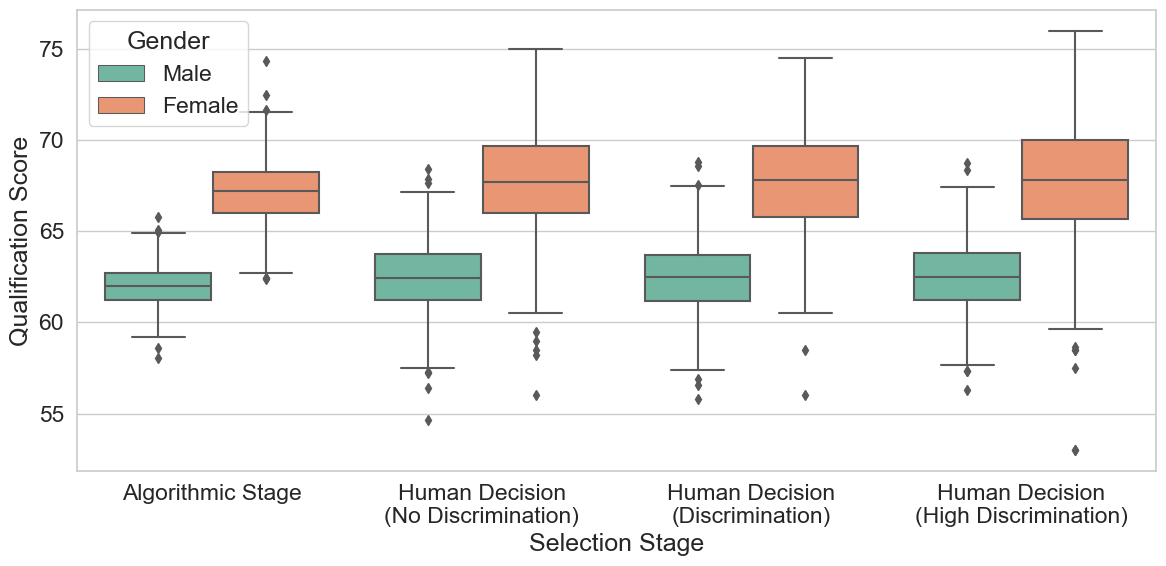

             Score
count  3991.000000
mean     64.945004
std       3.474625
min      53.000000
25%      62.187500
50%      64.545455
75%      67.545455
max      76.000000


In [7]:
# Example usage
fig, df = qual_plot.visualize_qualification_scores(
    qual_male_first_stage_df_lm_1,
    qual_female_first_stage_df_lm_1,
    qual_male_second_stage_df_lm_1,
    qual_female_second_stage_df_lm_1,
    show_debug=True
)

# Show the plot
plt.show()

# You can do more with the returned DataFrame if needed
print(df.describe())

# Random Forest Model - No Group Fairness

In [8]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

results_rf_1 = []

labels = ['Second Stage A', 'Second Stage B', 'Second Stage C']

qual_male_first_stage_df_rf_1 = []
qual_female_first_stage_df_rf_1 = []

qual_male_second_stage_df_rf_1 = []
qual_female_second_stage_df_rf_1 = []

cm_df_list = []
fairness_metrics_list = []

for discrimination in beta:
    (X_train, y_train, model, gender_shares1, all_selected_rf_1, gender_shares2,
     qual_male_first_stage, qual_female_first_stage,
     qual_male_second_stage, qual_female_second_stage, cm_df, fairness_metrics) = am.random_forest_model(X,y, "random_forest", discrimination, enforce_fairness=False)

    cm_df_list.append(cm_df)
    fairness_metrics_list.append(fairness_metrics)

    print("-"*30)

    # get mean of gender shares of list
    mean_value = statistics.mean(gender_shares1)
    print("Mean:", mean_value)

    # get mean for gender share 2
    mean_value = statistics.mean(gender_shares2)
    print("Mean:", mean_value)
    
    # get all_selected for each into results
    results_rf_1.append(all_selected_rf_1)

    print("-"*30)

    # Extract the values from each Series in the list and flatten it
    flat_qualification_male = [item.mean() for item in qual_male_first_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_first_stage if not item.empty]

    # Now, calculate the overall mean of the male qualifications
    mean_male_qualification = statistics.mean(flat_qualification_male)
    print("Mean Male Qualification:", mean_male_qualification)
    qual_male_first_stage_df_rf_1.append(flat_qualification_male)

    # get qual_female_first_stage mean
    mean_female_qualification = statistics.mean(flat_qualification_female)
    print("Mean Female Qualification:", mean_female_qualification)
    qual_female_first_stage_df_rf_1.append(flat_qualification_female)

    # second stage
    flat_qualification_male = [item.mean() for item in qual_male_second_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_second_stage if not item.empty]

    # append
    qual_male_second_stage_df_rf_1.append(flat_qualification_male)
    qual_female_second_stage_df_rf_1.append(flat_qualification_female)

------------------------------
Mean: 0.2388046869602856
Mean: 0.21
------------------------------
Mean Male Qualification: 61.92360740716544
Mean Female Qualification: 65.88340378707633
------------------------------
Mean: 0.2388046869602856
Mean: 0.3098
------------------------------
Mean Male Qualification: 61.92360740716544
Mean Female Qualification: 65.88340378707633
------------------------------
Mean: 0.2388046869602856
Mean: 0.4214
------------------------------
Mean Male Qualification: 61.92360740716544
Mean Female Qualification: 65.88340378707633


In [9]:
cm_df_list

[          Predicted 0  Predicted 1
 Actual 0          504           44
 Actual 1           78          158,
           Predicted 0  Predicted 1
 Actual 0          504           44
 Actual 1           78          158,
           Predicted 0  Predicted 1
 Actual 0          504           44
 Actual 1           78          158]

In [10]:
fairness_metrics_list

[{'tpr_difference': 0.020101285547331482,
  'fpr_difference': 0.011409226011969031,
  'fnr_difference': 0.020101285547331538,
  'tnr_difference': 0.011409226011969031,
  'equalized_odds_difference': 0.015755255779650257,
  'male_tpr': 0.6622516556291391,
  'female_tpr': 0.6823529411764706,
  'male_fpr': 0.08614232209737828,
  'female_fpr': 0.07473309608540925,
  'male_fnr': 0.33774834437086093,
  'female_fnr': 0.3176470588235294,
  'male_tnr': 0.9138576779026217,
  'female_tnr': 0.9252669039145908,
  'male_cm': {'tp': 100, 'fp': 23, 'fn': 51, 'tn': 244},
  'female_cm': {'tp': 58, 'fp': 21, 'fn': 27, 'tn': 260}},
 {'tpr_difference': 0.020101285547331482,
  'fpr_difference': 0.011409226011969031,
  'fnr_difference': 0.020101285547331538,
  'tnr_difference': 0.011409226011969031,
  'equalized_odds_difference': 0.015755255779650257,
  'male_tpr': 0.6622516556291391,
  'female_tpr': 0.6823529411764706,
  'male_fpr': 0.08614232209737828,
  'female_fpr': 0.07473309608540925,
  'male_fnr': 0.3

In [11]:
qual_means_per_beta = []

for beta_index, df in enumerate(results_rf_1):
    grouped = df.groupby('gender')['qual'].mean()

    qual_means_per_beta.append({
        'beta_index': beta_index,
        'male_mean_qual': grouped.get(0, float('nan')),
        'female_mean_qual': grouped.get(1, float('nan'))
    })

qual_means_df = pd.DataFrame(qual_means_per_beta)
print(qual_means_df)

   beta_index  male_mean_qual  female_mean_qual
0           0       62.469256         66.460000
1           1       62.463277         66.394958
2           2       62.458984         66.285862


DataFrame contains 3991 rows
Data types: Stage      object
Score     float64
Gender     object
dtype: object
Any NaN values: False

Summary Statistics:
                                                 mean     std   median
Stage                                 Gender                          
Algorithmic Stage                     Female  67.1200  1.6773  67.2265
                                      Male    61.9734  1.1700  62.0000
Human Decision\n(Discrimination)      Female  67.6952  2.8319  67.8000
                                      Male    62.4854  1.9994  62.5000
Human Decision\n(High Discrimination) Female  67.6571  3.2674  67.8000
                                      Male    62.5087  1.9841  62.5000
Human Decision\n(No Discrimination)   Female  67.6750  2.7893  67.7143
                                      Male    62.4942  2.0555  62.4460


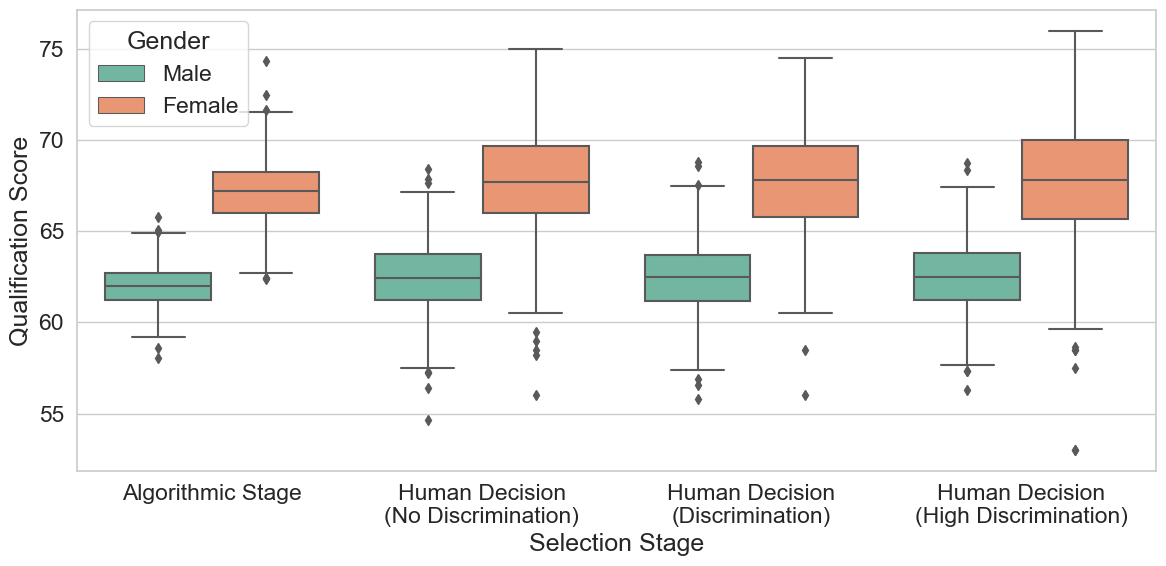

             Score
count  3991.000000
mean     64.945004
std       3.474625
min      53.000000
25%      62.187500
50%      64.545455
75%      67.545455
max      76.000000


In [12]:
# Example usage
fig, df = qual_plot.visualize_qualification_scores(
    qual_male_first_stage_df_lm_1,
    qual_female_first_stage_df_lm_1,
    qual_male_second_stage_df_lm_1,
    qual_female_second_stage_df_lm_1,
    show_debug=True
)

# Show the plot
plt.show()

# You can do more with the returned DataFrame if needed
print(df.describe())

# Logistic Model - Statistical Parity

In [13]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

results_lm_2 = []

labels = ['Second Stage A', 'Second Stage B', 'Second Stage C']

qual_male_first_stage_df_lm_2 = []
qual_female_first_stage_df_lm_2 = []

qual_male_second_stage_df_lm_2 = []
qual_female_second_stage_df_lm_2 = []

cm_df_list = []
fairness_metrics_list = []

for discrimination in beta: 
    (X_train, y_train, model, gender_shares1, all_selected_lm_2, gender_shares2,
     qual_male_first_stage, qual_female_first_stage,
     qual_male_second_stage, qual_female_second_stage, cm_df, fairness_metrics)  = am.logistic_regression(X,y, "logistic_fair", discrimination, enforce_fairness=True, fairness_constraint="demographic_parity")

    cm_df_list.append(cm_df)
    fairness_metrics_list.append(fairness_metrics)
    
    print("-"*30)

    # get mean of gender shares of list
    mean_value = statistics.mean(gender_shares1)
    print("Mean:", mean_value)

    # get mean for gender share 2
    mean_value = statistics.mean(gender_shares2)
    print("Mean:", mean_value)

    # get all_selected for each into results
    results_lm_2.append(all_selected_lm_2)

    print("-"*30)

    # Extract the values from each Series in the list and flatten it
    flat_qualification_male = [item.mean() for item in qual_male_first_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_first_stage if not item.empty]

    # Now, calculate the overall mean of the male qualifications
    mean_male_qualification = statistics.mean(flat_qualification_male)
    print("Mean Male Qualification:", mean_male_qualification)
    qual_male_first_stage_df_lm_2.append(flat_qualification_male)

    # get qual_female_first_stage mean
    mean_female_qualification = statistics.mean(flat_qualification_female)
    print("Mean Female Qualification:", mean_female_qualification)
    qual_female_first_stage_df_lm_2.append(flat_qualification_female)

    # second stage
    flat_qualification_male = [item.mean() for item in qual_male_second_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_second_stage if not item.empty]

    # append
    qual_male_second_stage_df_lm_2.append(flat_qualification_male)
    qual_female_second_stage_df_lm_2.append(flat_qualification_female)

------------------------------
Mean: 0.06208144491407964
Mean: 0.002799999999999998
------------------------------
Mean Male Qualification: 62.05715261666244
Mean Female Qualification: 66.62818485025137
------------------------------
Mean: 0.06139003416842622
Mean: 0.0842
------------------------------
Mean Male Qualification: 62.060140420368064
Mean Female Qualification: 66.63024406783778
------------------------------
Mean: 0.06168763743977319
Mean: 0.2168
------------------------------
Mean Male Qualification: 62.06335518375704
Mean Female Qualification: 66.625914901448


In [14]:
cm_df_list

[          Predicted 0  Predicted 1
 Actual 0          468           80
 Actual 1          141           95,
           Predicted 0  Predicted 1
 Actual 0          468           80
 Actual 1          141           95,
           Predicted 0  Predicted 1
 Actual 0          468           80
 Actual 1          142           94]

In [15]:
fairness_metrics_list

[{'tpr_difference': 0.032800934943513826,
  'fpr_difference': 0.0001599424207285316,
  'fnr_difference': 0.03280093494351388,
  'tnr_difference': 0.0001599424207285871,
  'equalized_odds_difference': 0.01648043868212118,
  'male_tpr': 0.39072847682119205,
  'female_tpr': 0.4235294117647059,
  'male_fpr': 0.14606741573033707,
  'female_fpr': 0.14590747330960854,
  'male_fnr': 0.609271523178808,
  'female_fnr': 0.5764705882352941,
  'male_tnr': 0.8539325842696629,
  'female_tnr': 0.8540925266903915,
  'male_cm': {'tp': 59, 'fp': 39, 'fn': 92, 'tn': 228},
  'female_cm': {'tp': 36, 'fp': 41, 'fn': 49, 'tn': 240}},
 {'tpr_difference': 0.032800934943513826,
  'fpr_difference': 0.007144094792541356,
  'fnr_difference': 0.03280093494351388,
  'tnr_difference': 0.0071440947925413,
  'equalized_odds_difference': 0.01997251486802759,
  'male_tpr': 0.39072847682119205,
  'female_tpr': 0.4235294117647059,
  'male_fpr': 0.14232209737827714,
  'female_fpr': 0.1494661921708185,
  'male_fnr': 0.6092715

In [16]:
qual_means_per_beta = []

for beta_index, df in enumerate(results_lm_2):
    grouped = df.groupby('gender')['qual'].mean()

    qual_means_per_beta.append({
        'beta_index': beta_index,
        'male_mean_qual': grouped.get(0, float('nan')),
        'female_mean_qual': grouped.get(1, float('nan'))
    })

qual_means_df = pd.DataFrame(qual_means_per_beta)
print(qual_means_df)

   beta_index  male_mean_qual  female_mean_qual
0           0        0.637211          0.701586
1           1        0.639678          0.700985
2           2        0.640289          0.699213


DataFrame contains 3991 rows
Data types: Stage      object
Score     float64
Gender     object
dtype: object
Any NaN values: False

Summary Statistics:
                                                 mean     std   median
Stage                                 Gender                          
Algorithmic Stage                     Female  67.1200  1.6773  67.2265
                                      Male    61.9734  1.1700  62.0000
Human Decision\n(Discrimination)      Female  67.6952  2.8319  67.8000
                                      Male    62.4854  1.9994  62.5000
Human Decision\n(High Discrimination) Female  67.6571  3.2674  67.8000
                                      Male    62.5087  1.9841  62.5000
Human Decision\n(No Discrimination)   Female  67.6750  2.7893  67.7143
                                      Male    62.4942  2.0555  62.4460


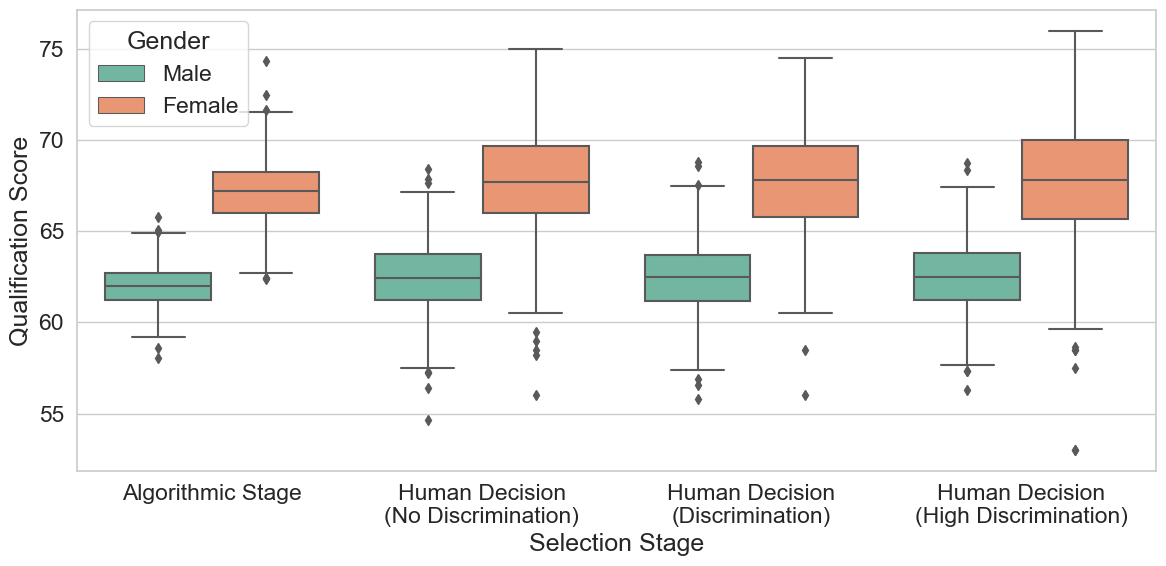

             Score
count  3991.000000
mean     64.945004
std       3.474625
min      53.000000
25%      62.187500
50%      64.545455
75%      67.545455
max      76.000000


In [17]:
# Example usage
fig, df = qual_plot.visualize_qualification_scores(
    qual_male_first_stage_df_lm_1,
    qual_female_first_stage_df_lm_1,
    qual_male_second_stage_df_lm_1,
    qual_female_second_stage_df_lm_1,
    show_debug=True
)

# Show the plot
plt.show()

# You can do more with the returned DataFrame if needed
print(df.describe())

# Random Forest Model - Statistical Parity

In [18]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

results_rf_2 = []

labels = ['Second Stage A', 'Second Stage B', 'Second Stage C']

qual_male_first_stage_df_rf_2 = []
qual_female_first_stage_df_rf_2 = []

qual_male_second_stage_df_rf_2 = []
qual_female_second_stage_df_rf_2 = []

cm_df_list = []
fairness_metrics_list = []

for discrimination in beta: 
    (X_train, y_train, model, gender_shares1, all_selected_rf_2, gender_shares2,
     qual_male_first_stage, qual_female_first_stage,
     qual_male_second_stage, qual_female_second_stage, cm_df, fairness_metrics)  = am.random_forest_model(X,y, "random_forest_fair", discrimination, enforce_fairness=True, fairness_constraint="demographic_parity")

    cm_df_list.append(cm_df)
    fairness_metrics_list.append(fairness_metrics)

    print("-"*30)

    # get mean of gender shares of list
    mean_value = statistics.mean(gender_shares1)
    print("Mean:", mean_value)

    # get mean for gender share 2
    mean_value = statistics.mean(gender_shares2)
    print("Mean:", mean_value)

    # get all_selected for each into results
    results_rf_2.append(all_selected_rf_2)

    print("-"*30)

    # Extract the values from each Series in the list and flatten it
    flat_qualification_male = [item.mean() for item in qual_male_first_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_first_stage if not item.empty]

    # Now, calculate the overall mean of the male qualifications
    mean_male_qualification = statistics.mean(flat_qualification_male)
    print("Mean Male Qualification:", mean_male_qualification)
    qual_male_first_stage_df_rf_2.append(flat_qualification_male)

    # get qual_female_first_stage mean
    mean_female_qualification = statistics.mean(flat_qualification_female)
    print("Mean Female Qualification:", mean_female_qualification)
    qual_female_first_stage_df_rf_2.append(flat_qualification_female)

    # second stage
    flat_qualification_male = [item.mean() for item in qual_male_second_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_second_stage if not item.empty]

    # append
    qual_male_second_stage_df_rf_2.append(flat_qualification_male)
    qual_female_second_stage_df_rf_2.append(flat_qualification_female)

------------------------------
Mean: -0.002969865874458214
Mean: 0.0046
------------------------------
Mean Male Qualification: 62.400010042786775
Mean Female Qualification: 65.35730239715602
------------------------------
Mean: -0.005168442309568963
Mean: 0.0826
------------------------------
Mean Male Qualification: 62.402173059312325
Mean Female Qualification: 65.36533654955583
------------------------------
Mean: -0.0032427558980502665
Mean: 0.2334
------------------------------
Mean Male Qualification: 62.40100273398313
Mean Female Qualification: 65.35662945886754


In [19]:
cm_df_list

[          Predicted 0  Predicted 1
 Actual 0          487           61
 Actual 1           75          161,
           Predicted 0  Predicted 1
 Actual 0          486           62
 Actual 1           74          162,
           Predicted 0  Predicted 1
 Actual 0          487           61
 Actual 1           75          161]

In [20]:
fairness_metrics_list

[{'tpr_difference': 0.2760420724581223,
  'fpr_difference': 0.1002172551214896,
  'fnr_difference': 0.27604207245812235,
  'tnr_difference': 0.1002172551214896,
  'equalized_odds_difference': 0.18812966378980595,
  'male_tpr': 0.5827814569536424,
  'female_tpr': 0.8588235294117647,
  'male_fpr': 0.0599250936329588,
  'female_fpr': 0.1601423487544484,
  'male_fnr': 0.41721854304635764,
  'female_fnr': 0.1411764705882353,
  'male_tnr': 0.9400749063670412,
  'female_tnr': 0.8398576512455516,
  'male_cm': {'tp': 88, 'fp': 16, 'fn': 63, 'tn': 251},
  'female_cm': {'tp': 73, 'fp': 45, 'fn': 12, 'tn': 236}},
 {'tpr_difference': 0.2878067783404753,
  'fpr_difference': 0.10377597398269955,
  'fnr_difference': 0.2878067783404753,
  'tnr_difference': 0.10377597398269955,
  'equalized_odds_difference': 0.19579137616158743,
  'male_tpr': 0.5827814569536424,
  'female_tpr': 0.8705882352941177,
  'male_fpr': 0.0599250936329588,
  'female_fpr': 0.16370106761565836,
  'male_fnr': 0.41721854304635764,
 

In [21]:
qual_means_per_beta = []

for beta_index, df in enumerate(results_rf_2):
    grouped = df.groupby('gender')['qual'].mean()

    qual_means_per_beta.append({
        'beta_index': beta_index,
        'male_mean_qual': grouped.get(0, float('nan')),
        'female_mean_qual': grouped.get(1, float('nan'))
    })

qual_means_df = pd.DataFrame(qual_means_per_beta)
print(qual_means_df)

   beta_index  male_mean_qual  female_mean_qual
0           0        0.652672          0.648807
1           1        0.655337          0.651428
2           2        0.654287          0.652386


DataFrame contains 3991 rows
Data types: Stage      object
Score     float64
Gender     object
dtype: object
Any NaN values: False

Summary Statistics:
                                                 mean     std   median
Stage                                 Gender                          
Algorithmic Stage                     Female  67.1200  1.6773  67.2265
                                      Male    61.9734  1.1700  62.0000
Human Decision\n(Discrimination)      Female  67.6952  2.8319  67.8000
                                      Male    62.4854  1.9994  62.5000
Human Decision\n(High Discrimination) Female  67.6571  3.2674  67.8000
                                      Male    62.5087  1.9841  62.5000
Human Decision\n(No Discrimination)   Female  67.6750  2.7893  67.7143
                                      Male    62.4942  2.0555  62.4460


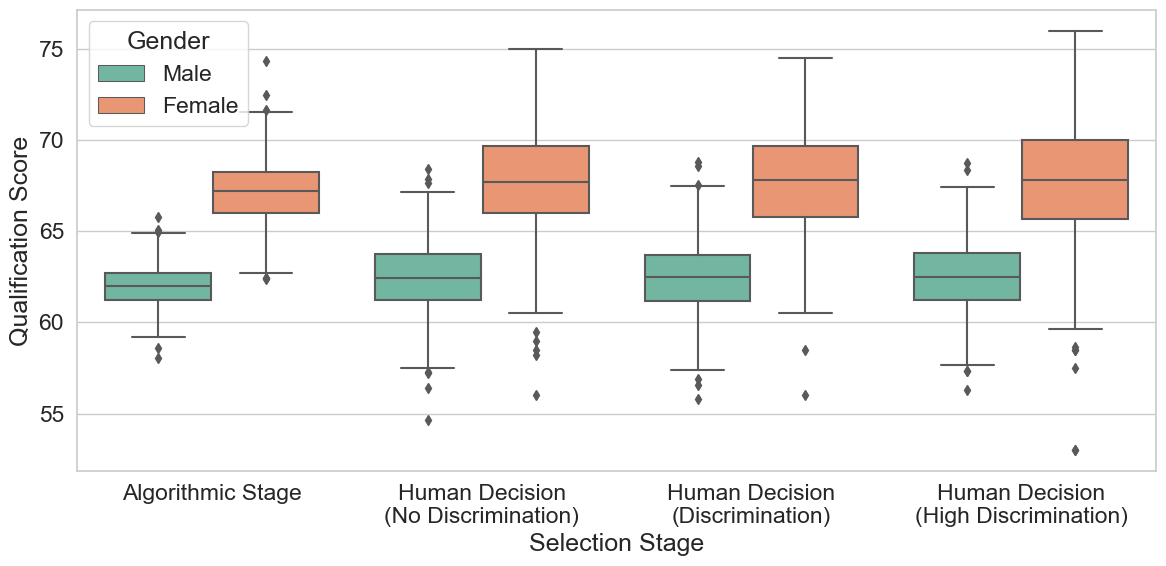

             Score
count  3991.000000
mean     64.945004
std       3.474625
min      53.000000
25%      62.187500
50%      64.545455
75%      67.545455
max      76.000000


In [22]:
# Example usage
fig, df = qual_plot.visualize_qualification_scores(
    qual_male_first_stage_df_lm_1,
    qual_female_first_stage_df_lm_1,
    qual_male_second_stage_df_lm_1,
    qual_female_second_stage_df_lm_1,
    show_debug=True
)

# Show the plot
plt.show()

# You can do more with the returned DataFrame if needed
print(df.describe())

# Logistic Model - Equalized Odds

In [23]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

results_lm_3 = []

labels = ['Second Stage A', 'Second Stage B', 'Second Stage C']

qual_male_first_stage_df_lm_3 = []
qual_female_first_stage_df_lm_3 = []

qual_male_second_stage_df_lm_3 = []
qual_female_second_stage_df_lm_3 = []

cm_df_list = []
fairness_metrics_list = []

for discrimination in beta:
    (X_train, y_train, model, gender_shares1, all_selected_lm_3, gender_shares2,
     qual_male_first_stage, qual_female_first_stage,
     qual_male_second_stage, qual_female_second_stage, cm_df, fairness_metrics)  = am.logistic_regression(X,y, "logistic_fair", discrimination, enforce_fairness=True, fairness_constraint="equalized_odds")

    cm_df_list.append(cm_df)
    fairness_metrics_list.append(fairness_metrics)
    
    print("-"*30)

    # get mean of gender shares of list
    mean_value = statistics.mean(gender_shares1)
    print("Mean:", mean_value)

    # get mean for gender share 2
    mean_value = statistics.mean(gender_shares2)
    print("Mean:", mean_value)
    
    # get all_selected for each into results
    results_lm_3.append(all_selected_lm_3)

    print("-"*30)

    # Extract the values from each Series in the list and flatten it
    flat_qualification_male = [item.mean() for item in qual_male_first_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_first_stage if not item.empty]

    # Now, calculate the overall mean of the male qualifications
    mean_male_qualification = statistics.mean(flat_qualification_male)
    print("Mean Male Qualification:", mean_male_qualification)
    qual_male_first_stage_df_lm_3.append(flat_qualification_male)

    # get qual_female_first_stage mean
    mean_female_qualification = statistics.mean(flat_qualification_female)
    print("Mean Female Qualification:", mean_female_qualification)
    qual_female_first_stage_df_lm_3.append(flat_qualification_female)

    # second stage
    flat_qualification_male = [item.mean() for item in qual_male_second_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_second_stage if not item.empty]

    # append
    qual_male_second_stage_df_lm_3.append(flat_qualification_male)
    qual_female_second_stage_df_lm_3.append(flat_qualification_female)

------------------------------
Mean: 0.10257739095901673
Mean: 0.0466
------------------------------
Mean Male Qualification: 62.054987889713004
Mean Female Qualification: 66.60127870506246
------------------------------
Mean: 0.10433062828916957
Mean: 0.1258
------------------------------
Mean Male Qualification: 62.04913416006894
Mean Female Qualification: 66.61158891631393
------------------------------
Mean: 0.10601617788300156
Mean: 0.2702
------------------------------
Mean Male Qualification: 62.05025915735885
Mean Female Qualification: 66.66265932365933


In [24]:
cm_df_list

[          Predicted 0  Predicted 1
 Actual 0          471           77
 Actual 1          140           96,
           Predicted 0  Predicted 1
 Actual 0          472           76
 Actual 1          143           93,
           Predicted 0  Predicted 1
 Actual 0          471           77
 Actual 1          143           93]

In [25]:
fairness_metrics_list

[{'tpr_difference': 0.026178418387222457,
  'fpr_difference': 0.010836099004358418,
  'fnr_difference': 0.026178418387222457,
  'tnr_difference': 0.010836099004358446,
  'equalized_odds_difference': 0.018507258695790438,
  'male_tpr': 0.3973509933774834,
  'female_tpr': 0.4235294117647059,
  'male_fpr': 0.14606741573033707,
  'female_fpr': 0.13523131672597866,
  'male_fnr': 0.6026490066225165,
  'female_fnr': 0.5764705882352941,
  'male_tnr': 0.8539325842696629,
  'female_tnr': 0.8647686832740213,
  'male_cm': {'tp': 60, 'fp': 39, 'fn': 91, 'tn': 228},
  'female_cm': {'tp': 36, 'fp': 38, 'fn': 49, 'tn': 243}},
 {'tpr_difference': 0.009271523178807972,
  'fpr_difference': 0.014394817865568399,
  'fnr_difference': 0.009271523178807972,
  'tnr_difference': 0.014394817865568399,
  'equalized_odds_difference': 0.011833170522188186,
  'male_tpr': 0.39072847682119205,
  'female_tpr': 0.4,
  'male_fpr': 0.14606741573033707,
  'female_fpr': 0.13167259786476868,
  'male_fnr': 0.609271523178808,


In [26]:
qual_means_per_beta = []

for beta_index, df in enumerate(results_lm_3):
    grouped = df.groupby('gender')['qual'].mean()

    qual_means_per_beta.append({
        'beta_index': beta_index,
        'male_mean_qual': grouped.get(0, float('nan')),
        'female_mean_qual': grouped.get(1, float('nan'))
    })

qual_means_df = pd.DataFrame(qual_means_per_beta)
print(qual_means_df)

   beta_index  male_mean_qual  female_mean_qual
0           0        0.638064          0.699688
1           1        0.639554          0.698996
2           2        0.640206          0.696010


DataFrame contains 3991 rows
Data types: Stage      object
Score     float64
Gender     object
dtype: object
Any NaN values: False

Summary Statistics:
                                                 mean     std   median
Stage                                 Gender                          
Algorithmic Stage                     Female  67.1200  1.6773  67.2265
                                      Male    61.9734  1.1700  62.0000
Human Decision\n(Discrimination)      Female  67.6952  2.8319  67.8000
                                      Male    62.4854  1.9994  62.5000
Human Decision\n(High Discrimination) Female  67.6571  3.2674  67.8000
                                      Male    62.5087  1.9841  62.5000
Human Decision\n(No Discrimination)   Female  67.6750  2.7893  67.7143
                                      Male    62.4942  2.0555  62.4460


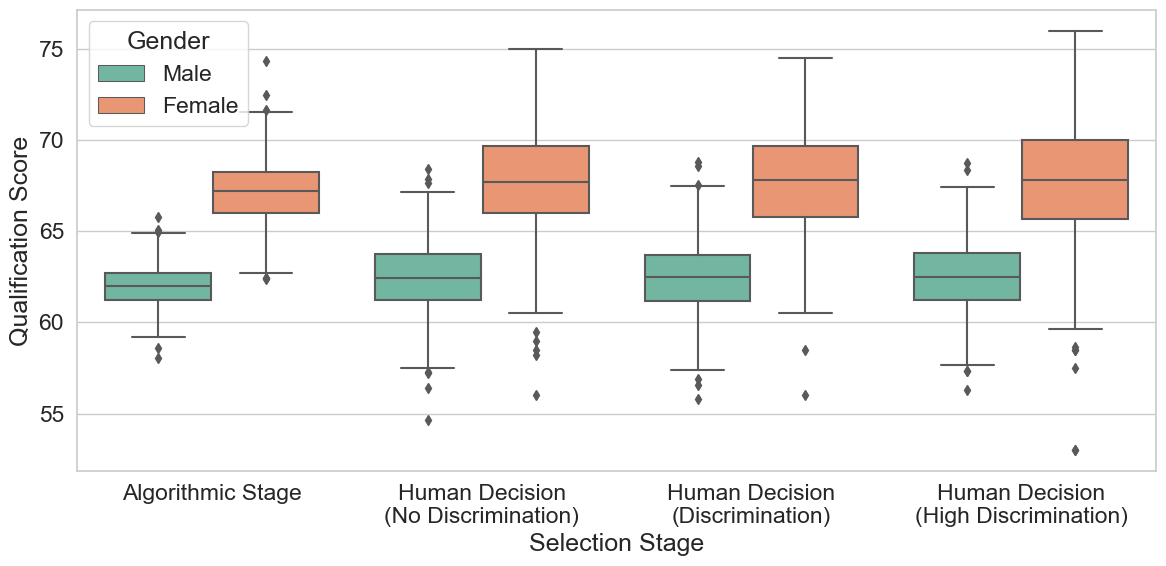

             Score
count  3991.000000
mean     64.945004
std       3.474625
min      53.000000
25%      62.187500
50%      64.545455
75%      67.545455
max      76.000000


In [27]:
# Example usage
fig, df = qual_plot.visualize_qualification_scores(
    qual_male_first_stage_df_lm_1,
    qual_female_first_stage_df_lm_1,
    qual_male_second_stage_df_lm_1,
    qual_female_second_stage_df_lm_1,
    show_debug=True
)

# Show the plot
plt.show()

# You can do more with the returned DataFrame if needed
print(df.describe())

# Random Forest Model - Equalized Odds

In [28]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

results_rf_3 = []

labels = ['Second Stage A', 'Second Stage B', 'Second Stage C']

qual_male_first_stage_df_rf_3 = []
qual_female_first_stage_df_rf_3 = []

qual_male_second_stage_df_rf_3 = []
qual_female_second_stage_df_rf_3 = []

cm_df_list = []
fairness_metrics_list = []

for discrimination in beta:
    (X_train, y_train, model, gender_shares1, all_selected_rf_3, gender_shares2,
     qual_male_first_stage, qual_female_first_stage,
     qual_male_second_stage, qual_female_second_stage, cm_df, fairness_metrics)  = am.random_forest_model(X,y, "random_forest_fair", discrimination, enforce_fairness=True, fairness_constraint="equalized_odds")

    cm_df_list.append(cm_df)
    fairness_metrics_list.append(fairness_metrics)

    print("-"*30)

    # get mean of gender shares of list
    mean_value = statistics.mean(gender_shares1)
    print("Mean:", mean_value)

    # get mean for gender share 2
    mean_value = statistics.mean(gender_shares2)
    print("Mean:", mean_value)

    # get all_selected for each into results
    results_rf_3.append(all_selected_rf_3)

    print("-"*30)

    # Extract the values from each Series in the list and flatten it
    flat_qualification_male = [item.mean() for item in qual_male_first_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_first_stage if not item.empty]

    # Now, calculate the overall mean of the male qualifications
    mean_male_qualification = statistics.mean(flat_qualification_male)
    print("Mean Male Qualification:", mean_male_qualification)
    qual_male_first_stage_df_rf_3.append(flat_qualification_male)

    # get qual_female_first_stage mean
    mean_female_qualification = statistics.mean(flat_qualification_female)
    print("Mean Female Qualification:", mean_female_qualification)
    qual_female_first_stage_df_rf_3.append(flat_qualification_female)

    # second stage
    flat_qualification_male = [item.mean() for item in qual_male_second_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_second_stage if not item.empty]

    # append
    qual_male_second_stage_df_rf_3.append(flat_qualification_male)
    qual_female_second_stage_df_rf_3.append(flat_qualification_female)

------------------------------
Mean: 0.20257224714361374
Mean: 0.2222
------------------------------
Mean Male Qualification: 61.677703361645875
Mean Female Qualification: 65.63378735102788
------------------------------
Mean: 0.2029057046693498
Mean: 0.2992
------------------------------
Mean Male Qualification: 61.67355834785051
Mean Female Qualification: 65.63575036682349
------------------------------
Mean: 0.20115357008418733
Mean: 0.4282
------------------------------
Mean Male Qualification: 61.66611508549358
Mean Female Qualification: 65.63806099039643


In [29]:
cm_df_list

[          Predicted 0  Predicted 1
 Actual 0          486           62
 Actual 1           57          179,
           Predicted 0  Predicted 1
 Actual 0          489           59
 Actual 1           56          180,
           Predicted 0  Predicted 1
 Actual 0          489           59
 Actual 1           57          179]

In [30]:
fairness_metrics_list

[{'tpr_difference': 0.04651343981301126,
  'fpr_difference': 0.013088621429618669,
  'fnr_difference': 0.04651343981301129,
  'tnr_difference': 0.013088621429618641,
  'equalized_odds_difference': 0.029801030621314964,
  'male_tpr': 0.7417218543046358,
  'female_tpr': 0.788235294117647,
  'male_fpr': 0.1198501872659176,
  'female_fpr': 0.10676156583629894,
  'male_fnr': 0.2582781456953642,
  'female_fnr': 0.21176470588235294,
  'male_tnr': 0.8801498127340824,
  'female_tnr': 0.8932384341637011,
  'male_cm': {'tp': 112, 'fp': 32, 'fn': 39, 'tn': 235},
  'female_cm': {'tp': 67, 'fp': 30, 'fn': 18, 'tn': 251}},
 {'tpr_difference': 0.02150370081807562,
  'fpr_difference': 0.0018526663734388937,
  'fnr_difference': 0.021503700818075566,
  'tnr_difference': 0.0018526663734389492,
  'equalized_odds_difference': 0.011678183595757258,
  'male_tpr': 0.7549668874172185,
  'female_tpr': 0.7764705882352941,
  'male_fpr': 0.10861423220973783,
  'female_fpr': 0.10676156583629894,
  'male_fnr': 0.2450

In [31]:
qual_means_per_beta = []

for beta_index, df in enumerate(results_rf_3):
    grouped = df.groupby('gender')['qual'].mean()

    qual_means_per_beta.append({
        'beta_index': beta_index,
        'male_mean_qual': grouped.get(0, float('nan')),
        'female_mean_qual': grouped.get(1, float('nan'))
    })

qual_means_df = pd.DataFrame(qual_means_per_beta)
print(qual_means_df)

   beta_index  male_mean_qual  female_mean_qual
0           0        0.657962          0.652196
1           1        0.658584          0.653204
2           2        0.657235          0.653702


DataFrame contains 3991 rows
Data types: Stage      object
Score     float64
Gender     object
dtype: object
Any NaN values: False

Summary Statistics:
                                                 mean     std   median
Stage                                 Gender                          
Algorithmic Stage                     Female  67.1200  1.6773  67.2265
                                      Male    61.9734  1.1700  62.0000
Human Decision\n(Discrimination)      Female  67.6952  2.8319  67.8000
                                      Male    62.4854  1.9994  62.5000
Human Decision\n(High Discrimination) Female  67.6571  3.2674  67.8000
                                      Male    62.5087  1.9841  62.5000
Human Decision\n(No Discrimination)   Female  67.6750  2.7893  67.7143
                                      Male    62.4942  2.0555  62.4460


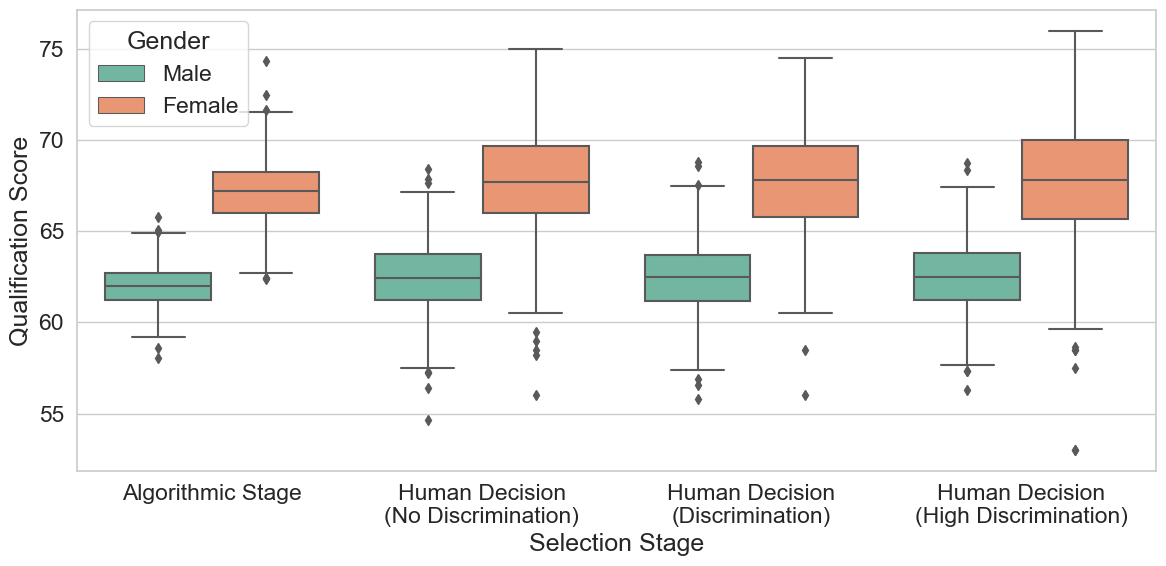

             Score
count  3991.000000
mean     64.945004
std       3.474625
min      53.000000
25%      62.187500
50%      64.545455
75%      67.545455
max      76.000000


In [32]:
# Example usage
fig, df = qual_plot.visualize_qualification_scores(
    qual_male_first_stage_df_lm_1,
    qual_female_first_stage_df_lm_1,
    qual_male_second_stage_df_lm_1,
    qual_female_second_stage_df_lm_1,
    show_debug=True
)

# Show the plot
plt.show()

# You can do more with the returned DataFrame if needed
print(df.describe())

# Logistic Model - Equal Opportunity

In [33]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

results_lm_4 = []

labels = ['Second Stage A', 'Second Stage B', 'Second Stage C']

qual_male_first_stage_df_lm_4 = []
qual_female_first_stage_df_lm_4 = []

qual_male_second_stage_df_lm_4 = []
qual_female_second_stage_df_lm_4 = []

cm_df_list = []
fairness_metrics_list = []

for discrimination in beta:
    (X_train, y_train, model, gender_shares1, all_selected_lm_4, gender_shares2,
     qual_male_first_stage, qual_female_first_stage,
     qual_male_second_stage, qual_female_second_stage, cm_df, fairness_metrics)  = am.logistic_regression(X,y, "logistic_fair", discrimination, enforce_fairness=True, fairness_constraint="equal_opportunity")

    cm_df_list.append(cm_df)
    fairness_metrics_list.append(fairness_metrics)
    
    print("-"*30)

    # get mean of gender shares of list
    mean_value = statistics.mean(gender_shares1)
    print("Mean:", mean_value)

    # get mean for gender share 2
    mean_value = statistics.mean(gender_shares2)
    print("Mean:", mean_value)

    # get all_selected for each into results
    results_lm_4.append(all_selected_lm_4)

    print("-"*30)

    # Extract the values from each Series in the list and flatten it
    flat_qualification_male = [item.mean() for item in qual_male_first_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_first_stage if not item.empty]

    # Now, calculate the overall mean of the male qualifications
    mean_male_qualification = statistics.mean(flat_qualification_male)
    print("Mean Male Qualification:", mean_male_qualification)
    qual_male_first_stage_df_lm_4.append(flat_qualification_male)

    # get qual_female_first_stage mean
    mean_female_qualification = statistics.mean(flat_qualification_female)
    print("Mean Female Qualification:", mean_female_qualification)
    qual_female_first_stage_df_lm_4.append(flat_qualification_female)

    # second stage
    flat_qualification_male = [item.mean() for item in qual_male_second_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_second_stage if not item.empty]

    # append
    qual_male_second_stage_df_lm_4.append(flat_qualification_male)
    qual_female_second_stage_df_lm_4.append(flat_qualification_female)

------------------------------
Mean: 0.11255069924157715
Mean: 0.0512
------------------------------
Mean Male Qualification: 62.05653303492325
Mean Female Qualification: 66.7083759636749
------------------------------
Mean: 0.11288204880651864
Mean: 0.1432
------------------------------
Mean Male Qualification: 62.05891575423296
Mean Female Qualification: 66.7083021164351
------------------------------
Mean: 0.11351346662730158
Mean: 0.2632
------------------------------
Mean Male Qualification: 62.06376208884026
Mean Female Qualification: 66.71272172802183


In [34]:
cm_df_list

[          Predicted 0  Predicted 1
 Actual 0          474           74
 Actual 1          144           92,
           Predicted 0  Predicted 1
 Actual 0          474           74
 Actual 1          144           92,
           Predicted 0  Predicted 1
 Actual 0          474           74
 Actual 1          144           92]

In [35]:
fairness_metrics_list

[{'tpr_difference': 0.0024931827035449827,
  'fpr_difference': 0.02151225558798832,
  'fnr_difference': 0.0024931827035450382,
  'tnr_difference': 0.021512255587988305,
  'equalized_odds_difference': 0.01200271914576665,
  'male_tpr': 0.39072847682119205,
  'female_tpr': 0.38823529411764707,
  'male_fpr': 0.14606741573033707,
  'female_fpr': 0.12455516014234876,
  'male_fnr': 0.609271523178808,
  'female_fnr': 0.611764705882353,
  'male_tnr': 0.8539325842696629,
  'female_tnr': 0.8754448398576512,
  'male_cm': {'tp': 59, 'fp': 39, 'fn': 92, 'tn': 228},
  'female_cm': {'tp': 33, 'fp': 35, 'fn': 52, 'tn': 246}},
 {'tpr_difference': 0.0024931827035449827,
  'fpr_difference': 0.02151225558798832,
  'fnr_difference': 0.0024931827035450382,
  'tnr_difference': 0.021512255587988305,
  'equalized_odds_difference': 0.01200271914576665,
  'male_tpr': 0.39072847682119205,
  'female_tpr': 0.38823529411764707,
  'male_fpr': 0.14606741573033707,
  'female_fpr': 0.12455516014234876,
  'male_fnr': 0.6

In [36]:
qual_means_per_beta = []

for beta_index, df in enumerate(results_lm_4):
    grouped = df.groupby('gender')['qual'].mean()

    qual_means_per_beta.append({
        'beta_index': beta_index,
        'male_mean_qual': grouped.get(0, float('nan')),
        'female_mean_qual': grouped.get(1, float('nan'))
    })

qual_means_df = pd.DataFrame(qual_means_per_beta)
print(qual_means_df)

   beta_index  male_mean_qual  female_mean_qual
0           0        0.640427          0.701556
1           1        0.640910          0.700210
2           2        0.641844          0.697332


DataFrame contains 3991 rows
Data types: Stage      object
Score     float64
Gender     object
dtype: object
Any NaN values: False

Summary Statistics:
                                                 mean     std   median
Stage                                 Gender                          
Algorithmic Stage                     Female  67.1200  1.6773  67.2265
                                      Male    61.9734  1.1700  62.0000
Human Decision\n(Discrimination)      Female  67.6952  2.8319  67.8000
                                      Male    62.4854  1.9994  62.5000
Human Decision\n(High Discrimination) Female  67.6571  3.2674  67.8000
                                      Male    62.5087  1.9841  62.5000
Human Decision\n(No Discrimination)   Female  67.6750  2.7893  67.7143
                                      Male    62.4942  2.0555  62.4460


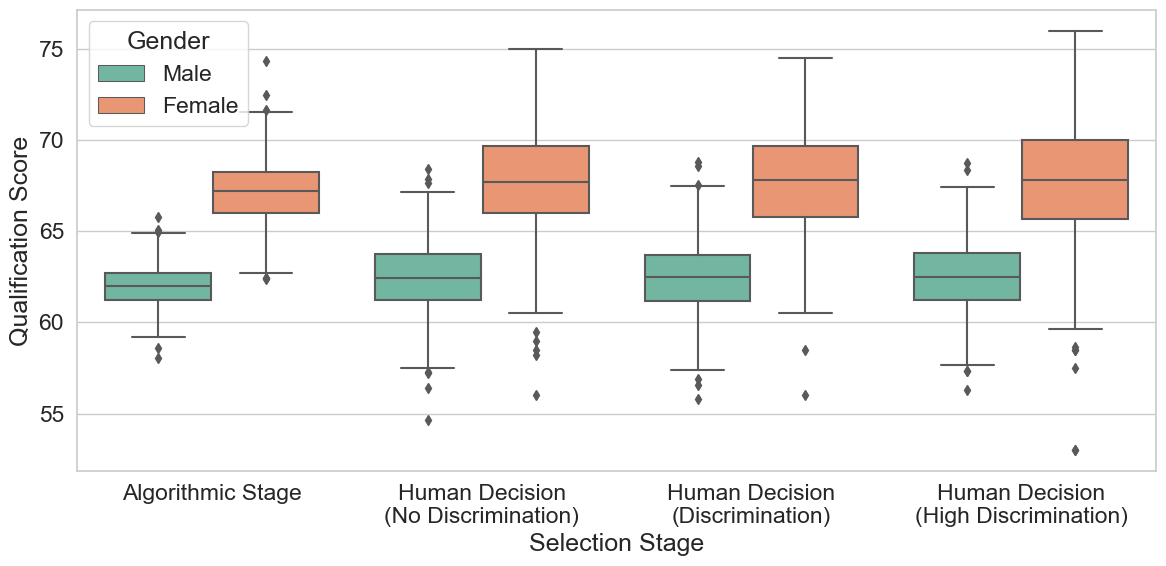

             Score
count  3991.000000
mean     64.945004
std       3.474625
min      53.000000
25%      62.187500
50%      64.545455
75%      67.545455
max      76.000000


In [37]:
# Example usage
fig, df = qual_plot.visualize_qualification_scores(
    qual_male_first_stage_df_lm_1,
    qual_female_first_stage_df_lm_1,
    qual_male_second_stage_df_lm_1,
    qual_female_second_stage_df_lm_1,
    show_debug=True
)

# Show the plot
plt.show()

# You can do more with the returned DataFrame if needed
print(df.describe())

# Random Forest Model - Equal Opportunity

In [38]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

results_rf_4 = []

labels = ['Second Stage A', 'Second Stage B', 'Second Stage C']

qual_male_first_stage_df_rf_4 = []
qual_female_first_stage_df_rf_4 = []

qual_male_second_stage_df_rf_4 = []
qual_female_second_stage_df_rf_4 = []

cm_df_list = []
fairness_metrics_list = []

for discrimination in beta:
    (X_train, y_train, model, gender_shares1, all_selected_rf_4, gender_shares2,
     qual_male_first_stage, qual_female_first_stage,
     qual_male_second_stage, qual_female_second_stage, cm_df, fairness_metrics)  = am.random_forest_model(X,y, "random_forest_fair", discrimination, enforce_fairness=True, fairness_constraint="equal_opportunity")

    cm_df_list.append(cm_df)
    fairness_metrics_list.append(fairness_metrics)
    
    print("-"*30)

    # get mean of gender shares of list
    mean_value = statistics.mean(gender_shares1)
    print("Mean:", mean_value)

    # get mean for gender share 2
    mean_value = statistics.mean(gender_shares2)
    print("Mean:", mean_value)

    # get all_selected for each into results
    results_rf_4.append(all_selected_rf_4)

    print("-"*30)

    # Extract the values from each Series in the list and flatten it
    flat_qualification_male = [item.mean() for item in qual_male_first_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_first_stage if not item.empty]

    # Now, calculate the overall mean of the male qualifications
    mean_male_qualification = statistics.mean(flat_qualification_male)
    print("Mean Male Qualification:", mean_male_qualification)
    qual_male_first_stage_df_rf_4.append(flat_qualification_male)

    # get qual_female_first_stage mean
    mean_female_qualification = statistics.mean(flat_qualification_female)
    print("Mean Female Qualification:", mean_female_qualification)
    qual_female_first_stage_df_rf_4.append(flat_qualification_female)

    # second stage
    flat_qualification_male = [item.mean() for item in qual_male_second_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_second_stage if not item.empty]

    # append
    qual_male_second_stage_df_rf_4.append(flat_qualification_male)
    qual_female_second_stage_df_rf_4.append(flat_qualification_female)

------------------------------
Mean: 0.16182595560067808
Mean: 0.18760000000000002
------------------------------
Mean Male Qualification: 62.1265117974203
Mean Female Qualification: 65.67863833826961
------------------------------
Mean: 0.16154821196928207
Mean: 0.2614
------------------------------
Mean Male Qualification: 62.145625392413
Mean Female Qualification: 65.66959848766955
------------------------------
Mean: 0.16300064368610143
Mean: 0.3866
------------------------------
Mean Male Qualification: 62.130073891143105
Mean Female Qualification: 65.67305953891646


In [39]:
cm_df_list

[          Predicted 0  Predicted 1
 Actual 0          493           55
 Actual 1           66          170,
           Predicted 0  Predicted 1
 Actual 0          491           57
 Actual 1           65          171,
           Predicted 0  Predicted 1
 Actual 0          493           55
 Actual 1           71          165]

In [40]:
fairness_metrics_list

[{'tpr_difference': 0.0693416439423451,
  'fpr_difference': 0.0014794673917389728,
  'fnr_difference': 0.06934164394234515,
  'tnr_difference': 0.0014794673917389867,
  'equalized_odds_difference': 0.035410555667042036,
  'male_tpr': 0.695364238410596,
  'female_tpr': 0.7647058823529411,
  'male_fpr': 0.10112359550561797,
  'female_fpr': 0.099644128113879,
  'male_fnr': 0.304635761589404,
  'female_fnr': 0.23529411764705882,
  'male_tnr': 0.898876404494382,
  'female_tnr': 0.900355871886121,
  'male_cm': {'tp': 105, 'fp': 27, 'fn': 46, 'tn': 240},
  'female_cm': {'tp': 65, 'fp': 28, 'fn': 20, 'tn': 253}},
 {'tpr_difference': 0.08110634982469811,
  'fpr_difference': 0.012942007543950848,
  'fnr_difference': 0.08110634982469808,
  'tnr_difference': 0.012942007543950806,
  'equalized_odds_difference': 0.04702417868432448,
  'male_tpr': 0.695364238410596,
  'female_tpr': 0.7764705882352941,
  'male_fpr': 0.09737827715355805,
  'female_fpr': 0.1103202846975089,
  'male_fnr': 0.3046357615894

In [41]:
qual_means_per_beta = []

for beta_index, df in enumerate(results_rf_4):
    grouped = df.groupby('gender')['qual'].mean()

    qual_means_per_beta.append({
        'beta_index': beta_index,
        'male_mean_qual': grouped.get(0, float('nan')),
        'female_mean_qual': grouped.get(1, float('nan'))
    })

qual_means_df = pd.DataFrame(qual_means_per_beta)
print(qual_means_df)

   beta_index  male_mean_qual  female_mean_qual
0           0        0.661353          0.650634
1           1        0.659402          0.652567
2           2        0.660164          0.649578


DataFrame contains 3991 rows
Data types: Stage      object
Score     float64
Gender     object
dtype: object
Any NaN values: False

Summary Statistics:
                                                 mean     std   median
Stage                                 Gender                          
Algorithmic Stage                     Female  67.1200  1.6773  67.2265
                                      Male    61.9734  1.1700  62.0000
Human Decision\n(Discrimination)      Female  67.6952  2.8319  67.8000
                                      Male    62.4854  1.9994  62.5000
Human Decision\n(High Discrimination) Female  67.6571  3.2674  67.8000
                                      Male    62.5087  1.9841  62.5000
Human Decision\n(No Discrimination)   Female  67.6750  2.7893  67.7143
                                      Male    62.4942  2.0555  62.4460


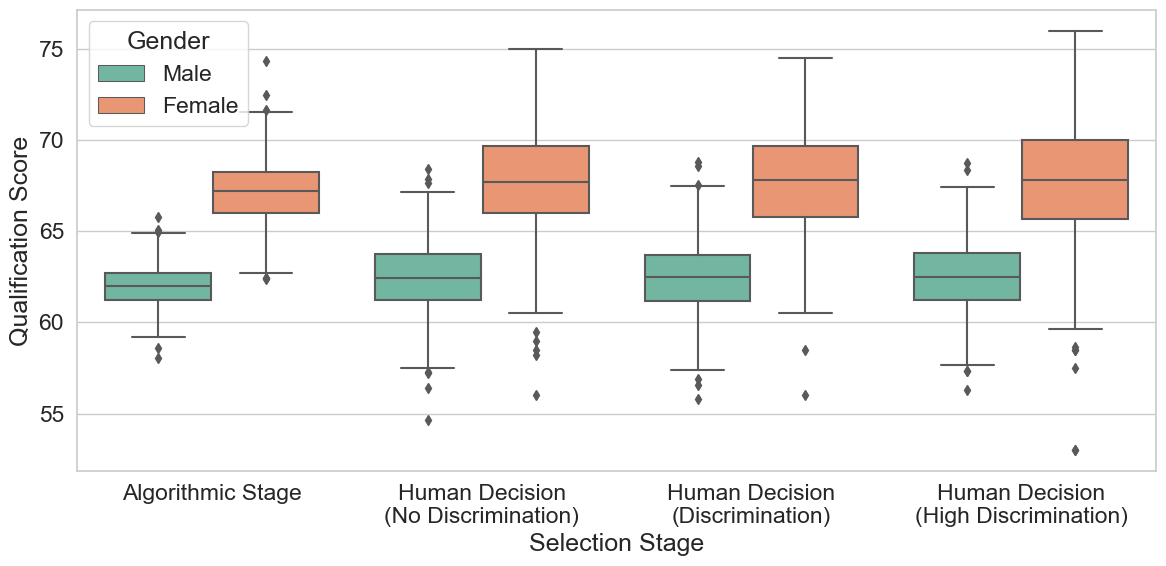

             Score
count  3991.000000
mean     64.945004
std       3.474625
min      53.000000
25%      62.187500
50%      64.545455
75%      67.545455
max      76.000000


In [42]:
# Example usage
fig, df = qual_plot.visualize_qualification_scores(
    qual_male_first_stage_df_lm_1,
    qual_female_first_stage_df_lm_1,
    qual_male_second_stage_df_lm_1,
    qual_female_second_stage_df_lm_1,
    show_debug=True
)

# Show the plot
plt.show()

# You can do more with the returned DataFrame if needed
print(df.describe())

# Simulation Evaluation

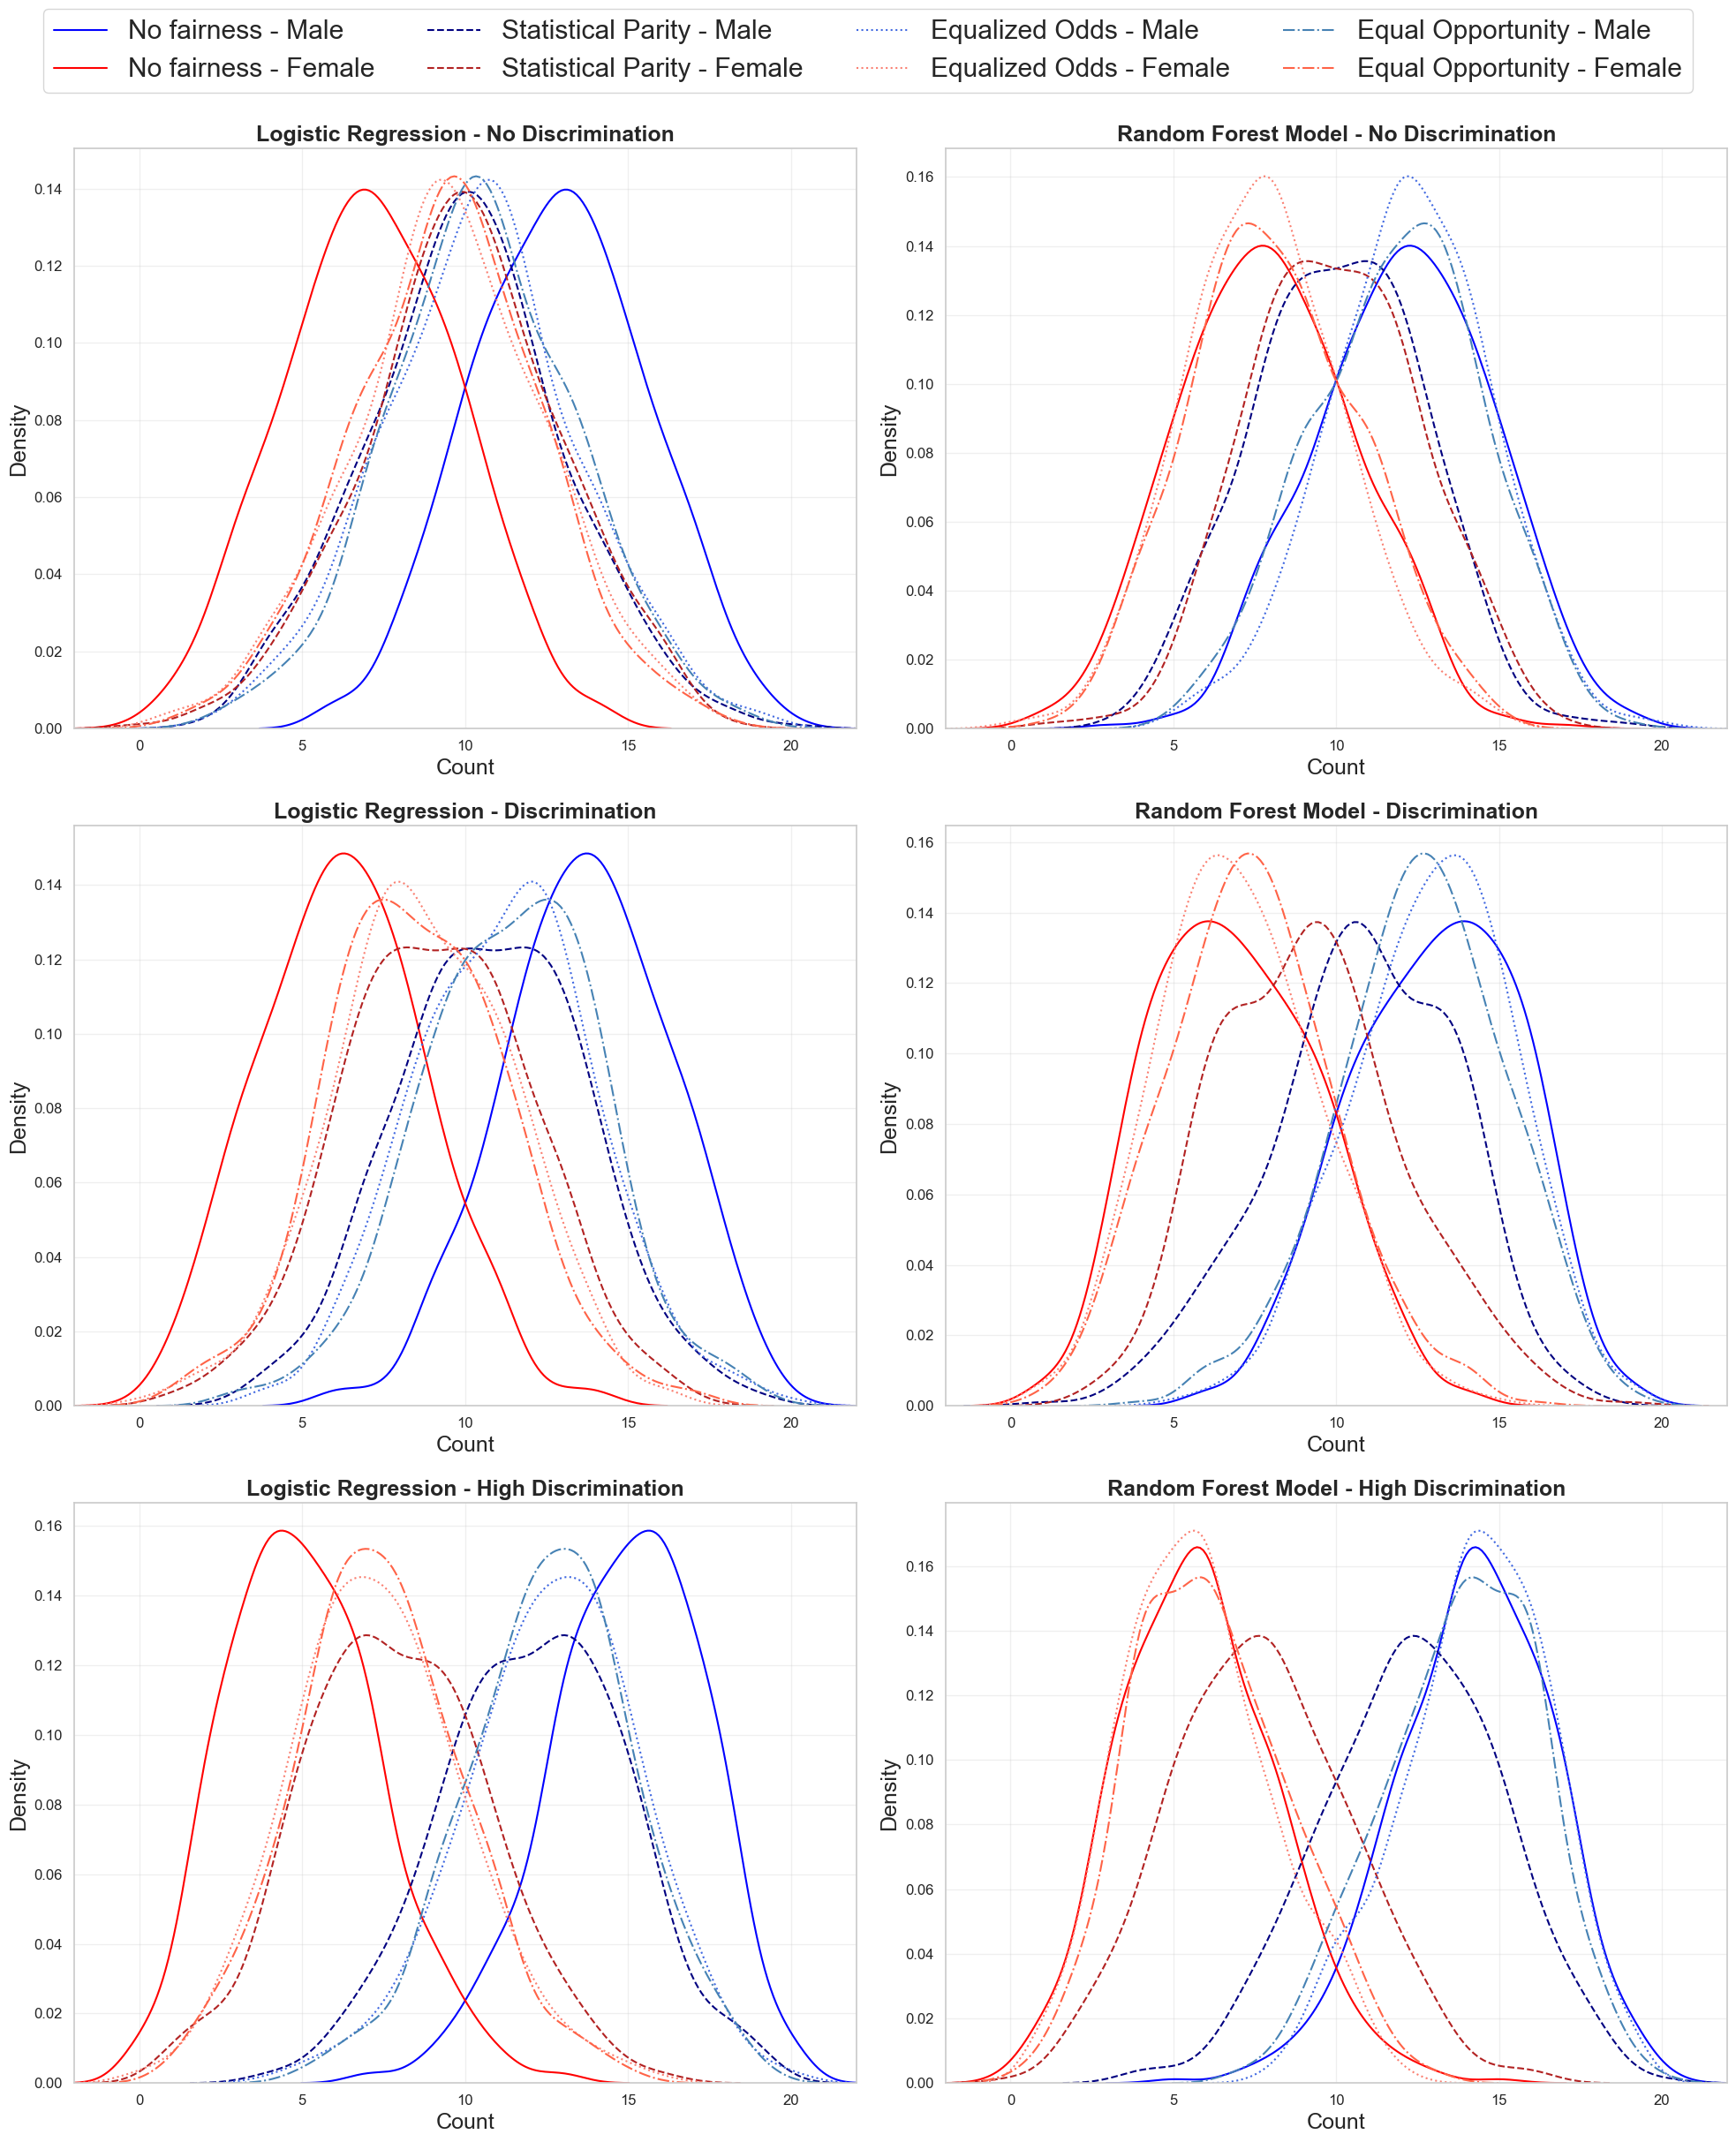

In [43]:
import matplotlib.pyplot as plt
import warnings

# Ignore specific FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning, message=".*use_inf_as_na.*")

# Define titles
logistic_titles = [
    "Logistic Regression - No Discrimination",
    "Logistic Regression - Discrimination",
    "Logistic Regression - High Discrimination"
]

rf_titles = [
    "Random Forest Model - No Discrimination",
    "Random Forest Model - Discrimination",
    "Random Forest Model - High Discrimination"
]

# Create a 3x2 subplot figure
fig, axes = plt.subplots(3, 2, figsize=(20, 24))

# Placeholder for handles and labels
legend_handles = None
legend_labels = None

# Plot Logistic Regression results (left column)
for i, ((res1, res2, res3, res4), title) in enumerate(zip(
    zip(results_lm_1, results_lm_2, results_lm_3, results_lm_4), 
    logistic_titles
)):
    ax = axes[i, 0]
    sm_vis.plot_multiple_gender_distribution_kde_with_ax(
        res1, res2, res3, res4,
        labels=["No fairness", "Statistical Parity", "Equalized Odds", "Equal Opportunity"],
        title=title,
        ax=ax,
        show_legend=False  
    )
    if legend_handles is None:
        legend_handles, legend_labels = ax.get_legend_handles_labels()

# Plot Random Forest results (right column)
for i, ((res1, res2, res3, res4), title) in enumerate(zip(
    zip(results_rf_1, results_rf_2, results_rf_3, results_rf_4), 
    rf_titles
)):
    ax = axes[i, 1]
    sm_vis.plot_multiple_gender_distribution_kde_with_ax(
        res1, res2, res3, res4,
        labels=["No fairness", "Statistical Parity", "Equalized Odds", "Equal Opportunity"],
        title=title,
        ax=ax,
        show_legend=False
    )

# Add a single shared legend above all plots
fig.legend(
    legend_handles,
    legend_labels,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.02), 
    ncol=4,
    fontsize='large'
)

# Adjust layout to make room for the top legend
plt.tight_layout(rect=[0, 0, 1, 0.97])  

# Save and display
fig.savefig('graphics/combined_logistic_rf_plots.png', dpi=300, bbox_inches='tight')
plt.show()

# Qualification Evaluation

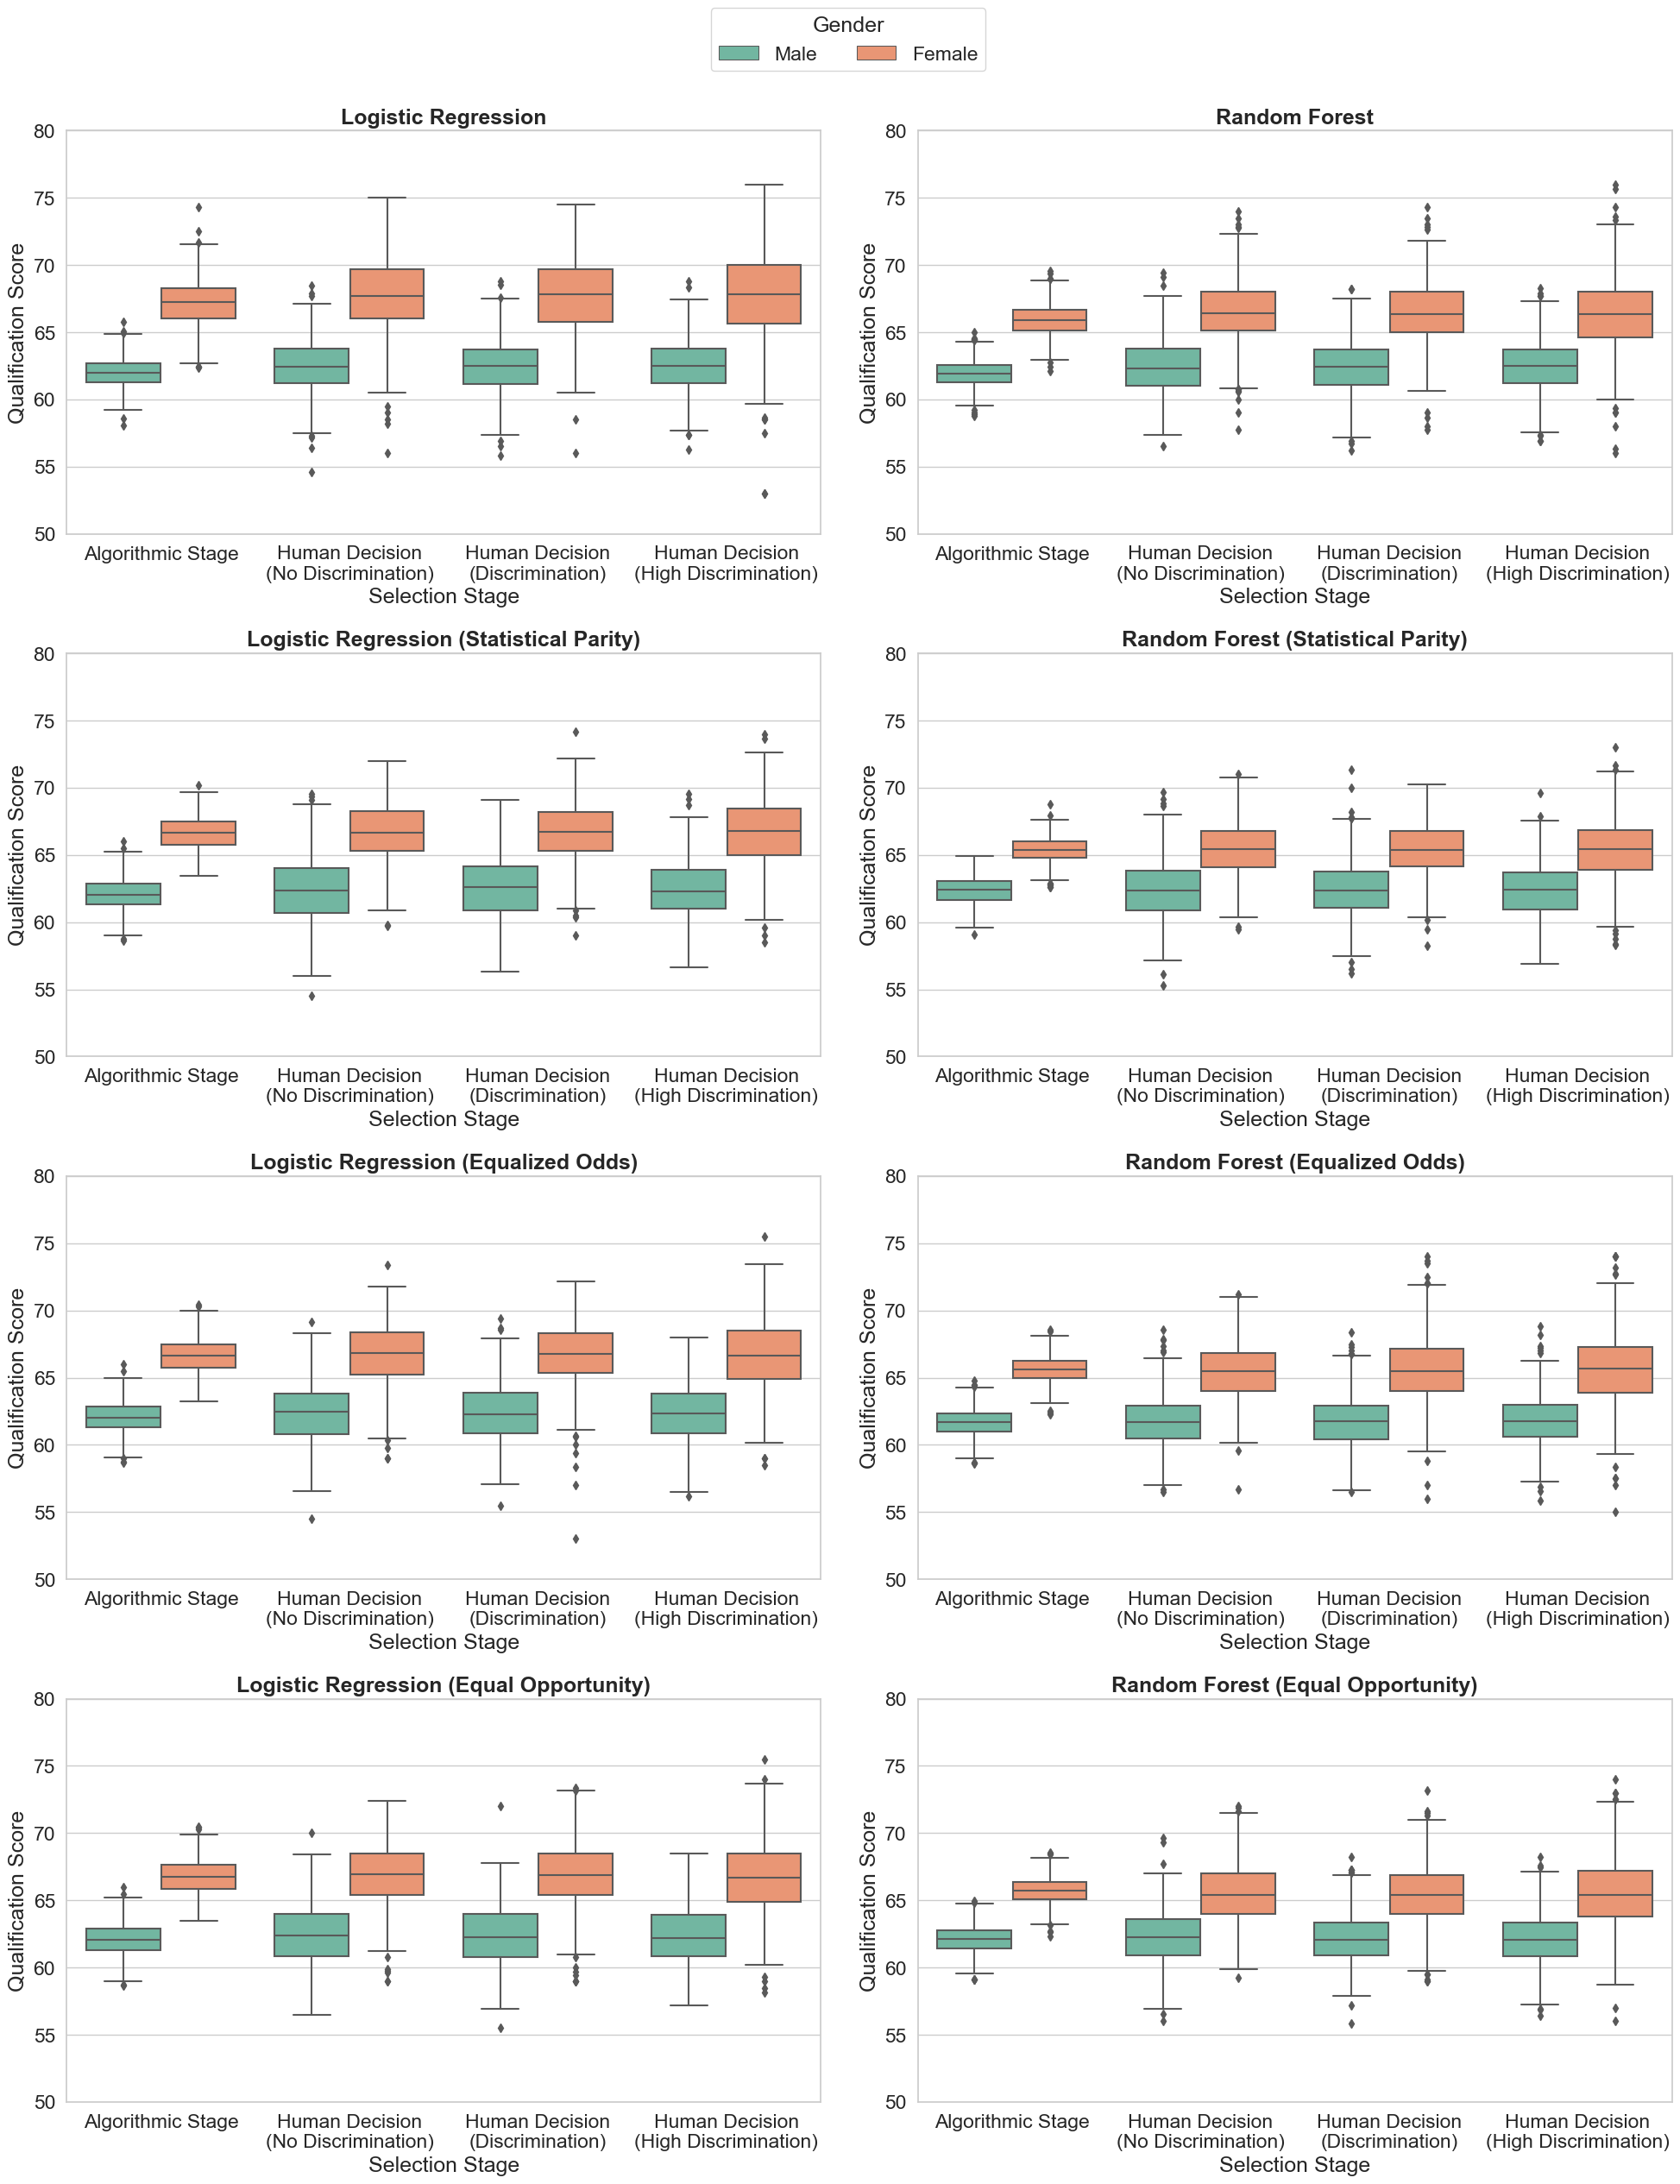

In [44]:
# Visualise Plot of Qualification
data_dict = {
    'rf_1': (
        qual_male_first_stage_df_rf_1,
        qual_female_first_stage_df_rf_1,
        qual_male_second_stage_df_rf_1,
        qual_female_second_stage_df_rf_1
    ),
    'rf_2': (
        qual_male_first_stage_df_rf_2,
        qual_female_first_stage_df_rf_2,
        qual_male_second_stage_df_rf_2,
        qual_female_second_stage_df_rf_2
    ),
    'rf_3': (
        qual_male_first_stage_df_rf_3,
        qual_female_first_stage_df_rf_3,
        qual_male_second_stage_df_rf_3,
        qual_female_second_stage_df_rf_3
    ),
    'rf_4': (
        qual_male_first_stage_df_rf_4,
        qual_female_first_stage_df_rf_4,
        qual_male_second_stage_df_rf_4,
        qual_female_second_stage_df_rf_4
    ),
    'lm_1': (
        qual_male_first_stage_df_lm_1,
        qual_female_first_stage_df_lm_1,
        qual_male_second_stage_df_lm_1,
        qual_female_second_stage_df_lm_1
    ),
    'lm_2': (
        qual_male_first_stage_df_lm_2,
        qual_female_first_stage_df_lm_2,
        qual_male_second_stage_df_lm_2,
        qual_female_second_stage_df_lm_2
    ),
    'lm_3': (
        qual_male_first_stage_df_lm_3,
        qual_female_first_stage_df_lm_3,
        qual_male_second_stage_df_lm_3,
        qual_female_second_stage_df_lm_3
    ),
    'lm_4': (
        qual_male_first_stage_df_lm_4,
        qual_female_first_stage_df_lm_4,
        qual_male_second_stage_df_lm_4,
        qual_female_second_stage_df_lm_4
    )
}

fig = qual_plot.visualize_qualification_grid(
    model_list=['lm_1', 'lm_2', 'lm_3', 'lm_4', 'rf_1', 'rf_2', 'rf_3', 'rf_4'],  
    variable_dict=data_dict,
    visualize_function=qual_plot.visualize_qualification_scores
)

plt.show()